In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import env

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# Wrangling
from sklearn.model_selection import train_test_split

import acquire
#import summarize
import prepare

In [2]:
#URL function
def get_db_url(host, username, password, database):
    return f'mysql+pymysql://{username}:{password}@{host}/{database}'


In [3]:
#Declare the database and url
def get_conn():
    db = 'zillow'
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'
    return url

In [4]:
#Create the SQL query
query = '''
        SELECT prop.*,
        predictions_2017.logerror,
        predictions_2017.transactiondate,
        air.airconditioningdesc,
        arch.architecturalstyledesc,
        build.buildingclassdesc,
        heat.heatingorsystemdesc,
        land.propertylandusedesc,
        story.storydesc,
        type.typeconstructiondesc
        FROM properties_2017 prop
        JOIN (
            SELECT parcelid, MAX(transactiondate) AS max_transactiondate
            FROM predictions_2017
            GROUP BY parcelid
            ) pred USING(parcelid)
        JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
                          AND pred.max_transactiondate = predictions_2017.transactiondate
        LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
        LEFT JOIN storytype story USING(storytypeid)
        LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
        WHERE propertylandusedesc = "Single Family Residential"
            AND transactiondate <= '2017-12-31'
            AND prop.longitude IS NOT NULL
            AND prop.latitude IS NOT NULL
        '''

In [5]:
def get_zillow():
    df = pd.read_sql(query, get_conn())
    df = df.drop(columns='id')
    return df

In [6]:
df = get_zillow()

In [7]:
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,14297519,NaN,NaN,NaN,3.50,4.00,None,NaN,3.50,NaN,...,"60,590,630,072,012.00",0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,17052889,NaN,NaN,NaN,1.00,2.00,None,NaN,1.00,NaN,...,"61,110,010,023,006.00",0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,14186244,NaN,NaN,NaN,2.00,3.00,None,NaN,2.00,NaN,...,"60,590,218,022,012.00",0.01,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,12177905,NaN,NaN,NaN,3.00,4.00,None,8.00,3.00,NaN,...,"60,373,001,001,006.00",-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,12095076,1.00,NaN,NaN,3.00,4.00,None,9.00,3.00,NaN,...,"60,374,608,001,014.00",-0.00,2017-01-01,Central,None,None,Central,Single Family Residential,None,None


### Summary Statistics

In [8]:
df.info()
#Write some stuff tomorrow

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52319 entries, 0 to 52318
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52319 non-null  int64  
 1   airconditioningtypeid         13615 non-null  float64
 2   architecturalstyletypeid      70 non-null     float64
 3   basementsqft                  47 non-null     float64
 4   bathroomcnt                   52319 non-null  float64
 5   bedroomcnt                    52319 non-null  float64
 6   buildingclasstypeid           0 non-null      object 
 7   buildingqualitytypeid         33654 non-null  float64
 8   calculatedbathnbr             52184 non-null  float64
 9   decktypeid                    389 non-null    float64
 10  finishedfloor1squarefeet      4371 non-null   float64
 11  calculatedfinishedsquarefeet  52238 non-null  float64
 12  finishedsquarefeet12          52073 non-null  float64
 13  f

In [9]:
df.describe()

#Go to bed early, get some rest, and catch up on work tomorrow early.

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,"52,319.00","13,615.00",70.00,47.00,"52,319.00","52,319.00","33,654.00","52,184.00",389.00,"4,371.00",...,"14,532.00",81.00,"52,237.00","52,318.00","52,319.00","52,318.00","52,315.00","2,068.00","52,198.00","52,319.00"
mean,"12,996,817.91",2.44,7.10,678.98,2.30,3.30,6.26,2.31,66.00,"1,546.29",...,1.41,1.00,"196,638.47","529,828.67","2,016.00","333,494.64","6,454.80",14.10,"60,502,451,458,870.97",0.02
std,"3,350,951.35",3.85,2.67,711.83,1.02,0.95,1.72,1.02,0.00,675.34,...,0.54,0.00,"254,288.05","751,835.82",0.00,"570,515.68","8,752.55",2.40,"1,861,144,772,484.99",0.18
min,"10,711,855.00",1.00,2.00,38.00,0.00,0.00,1.00,1.00,66.00,184.00,...,1.00,1.00,129.00,"1,000.00","2,016.00",161.00,49.18,4.00,"60,371,011,101,000.00",-4.66
25%,"11,510,167.50",1.00,7.00,263.50,2.00,3.00,5.00,2.00,66.00,"1,151.00",...,1.00,1.00,"77,159.00","194,020.50","2,016.00","76,194.00","2,660.97",14.00,"60,374,012,032,009.00",-0.02
50%,"12,578,254.00",1.00,7.00,512.00,2.00,3.00,6.00,2.00,66.00,"1,410.00",...,1.00,1.00,"131,910.00","374,008.00","2,016.00","218,079.00","4,650.62",15.00,"60,376,203,012,018.00",0.01
75%,"14,130,361.00",1.00,7.00,809.50,3.00,4.00,8.00,3.00,66.00,"1,760.00",...,2.00,1.00,"226,455.00","619,358.00","2,016.00","408,779.50","7,379.32",15.00,"60,590,423,261,001.00",0.04
max,"167,687,839.00",13.00,21.00,"3,560.00",18.00,14.00,12.00,18.00,66.00,"6,912.00",...,6.00,1.00,"9,164,901.00","49,061,236.00","2,016.00","48,952,198.00","586,639.30",99.00,"483,030,105,084,015.00",5.26


In [10]:
df.shape

(52319, 67)

In [11]:
df.columns.value_counts().isna()

parcelid                      False
structuretaxvaluedollarcnt    False
regionidcity                  False
regionidcounty                False
regionidneighborhood          False
                              ...  
poolsizesum                   False
pooltypeid10                  False
pooltypeid2                   False
pooltypeid7                   False
typeconstructiondesc          False
Length: 67, dtype: bool

In [12]:
def missing_rows_count_percentage(df):

    # This function returns number of rows missing and their percentage

    data = pd.DataFrame({
        'row_count': df.isna().sum(),
        'row_percent': df.isna().mean(),
    })

    return data

In [13]:
missing_rows_count_percentage(df).head()

,row_count,row_percent
parcelid,0,0.00
airconditioningtypeid,38704,0.74
architecturalstyletypeid,52249,1.00
basementsqft,52272,1.00
bathroomcnt,0,0.00


(-1.0, 1.0)

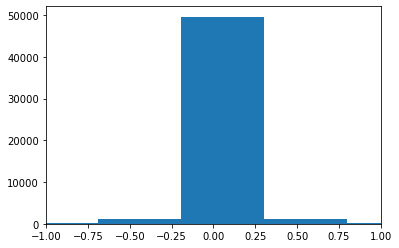

In [14]:
#Distribution of target variable
plt.hist(x=df['logerror'], bins=20)
plt.xlim(-1, 1)

In [15]:
#Value counts of the poolcnt column
df['poolcnt'].value_counts()

1.00    11077
Name: poolcnt, dtype: int64

In [16]:
#Define function to calculate number and percent of values missing from each column
def null_counter(df):
    
    new_columns = ['name', 'num_rows_missing', 'pct_rows_missing']
    
    new_df = pd.DataFrame(columns=new_columns)
    
    for col in list(df.columns):
        num_missing = df[col].isna().sum()
        pct_missing = num_missing / df.shape[0]
        
        add_df = pd.DataFrame([{'name': col, 'num_rows_missing': num_missing,
                               'pct_rows_missing': pct_missing}])
        
        new_df = pd.concat([new_df, add_df], axis=0)
        
    new_df.set_index('name', inplace=True)
    
    return new_df

In [17]:
#Execute my function and verify the results
null_df = null_counter(df)

null_df.head()

,num_rows_missing,pct_rows_missing
name,,
parcelid,0,0.00
airconditioningtypeid,38704,0.74
architecturalstyletypeid,52249,1.00
basementsqft,52272,1.00
bathroomcnt,0,0.00


In [18]:
#Check the shape to make sure I capture all columns
null_df.shape

(67, 2)

### Prepare
#### Question 1

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.


In [19]:
#Maybe there are some houses with no square footage?
df[df['calculatedfinishedsquarefeet'] == 0]


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


In [20]:
#What about nonexistent lots?
df[df['lotsizesquarefeet'] == 0]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc


### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [21]:

#Define function to drop columns/rows based on proportion of nulls
def null_dropper(df, prop_required_column, prop_required_row):
    
    prop_null_column = 1 - prop_required_column
    
    for col in list(df.columns):
        
        null_sum = df[col].isna().sum()
        null_pct = null_sum / df.shape[0]
        
        if null_pct > prop_null_column:
            df.drop(columns=col, inplace=True)
            
    row_threshold = int(prop_required_row * df.shape[1])
    
    df.dropna(axis=0, thresh=row_threshold, inplace=True)
    
    return df

In [22]:
#Execute my function and visualize the results
clean_df = null_dropper(df, 0.75, 0.75)

clean_df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,14297519,3.50,4.00,3.50,"3,100.00","3,100.00","6,059.00",3.00,"33,634,931.00","-117,869,207.00",...,"1,998.00","485,713.00","1,023,282.00","2,016.00","537,569.00","11,013.72","60,590,630,072,012.00",0.03,2017-01-01,Single Family Residential
1,17052889,1.00,2.00,1.00,"1,465.00","1,465.00","6,111.00",1.00,"34,449,266.00","-119,281,531.00",...,"1,967.00","88,000.00","464,000.00","2,016.00","376,000.00","5,672.48","61,110,010,023,006.00",0.06,2017-01-01,Single Family Residential
2,14186244,2.00,3.00,2.00,"1,243.00","1,243.00","6,059.00",2.00,"33,886,168.00","-117,823,170.00",...,"1,962.00","85,289.00","564,778.00","2,016.00","479,489.00","6,488.30","60,590,218,022,012.00",0.01,2017-01-01,Single Family Residential
3,12177905,3.00,4.00,3.00,"2,376.00","2,376.00","6,037.00",3.00,"34,245,180.00","-118,240,722.00",...,"1,970.00","108,918.00","145,143.00","2,016.00","36,225.00","1,777.51","60,373,001,001,006.00",-0.10,2017-01-01,Single Family Residential
4,12095076,3.00,4.00,3.00,"2,962.00","2,962.00","6,037.00",3.00,"34,145,202.00","-118,179,824.00",...,"1,950.00","276,684.00","773,303.00","2,016.00","496,619.00","9,516.26","60,374,608,001,014.00",-0.00,2017-01-01,Single Family Residential


In [23]:

#Check shape of resulting dataframe
clean_df.shape

(52315, 28)

In [24]:
#Save a copy of the clean csv to my local machine
clean_df.to_csv('zillow.csv')

### From here, continue in Explore

In [25]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(clean_df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)


train observations:  820288
validate observations:  351568
test observations:  292964


#### Explore

1. Ask questions.

2. Answer questions via visualizations and statistical tests.

3. Summarize.

### Target Variable = logerror

#### 1. What is the distribution of each of the variables?

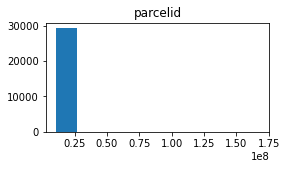

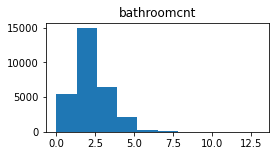

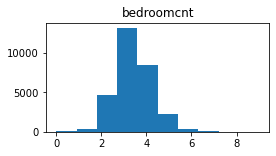

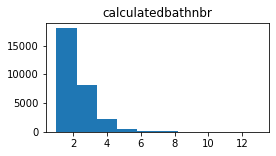

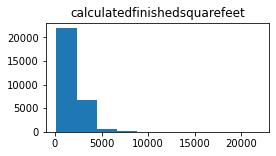

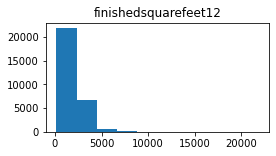

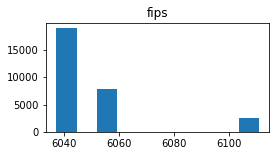

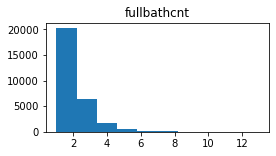

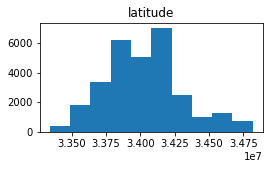

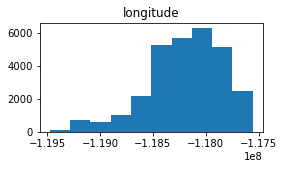

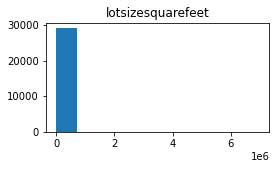

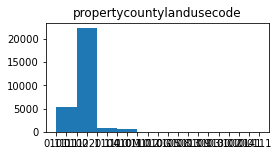

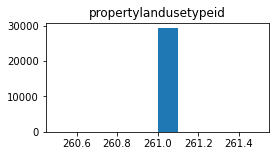

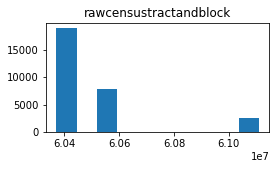

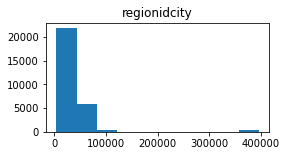

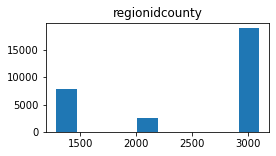

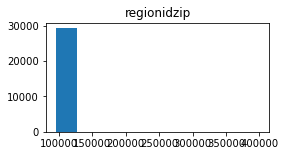

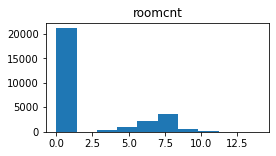

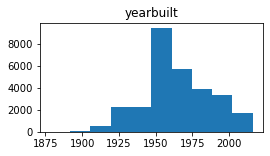

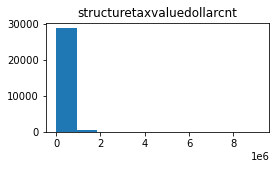

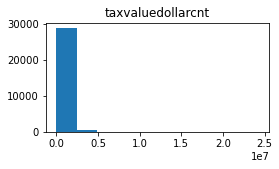

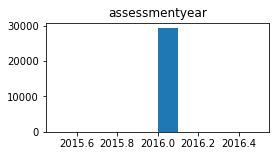

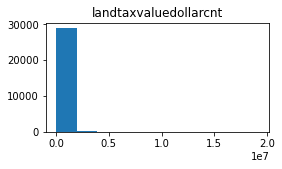

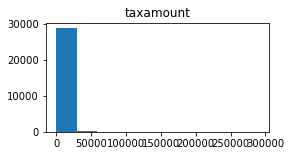

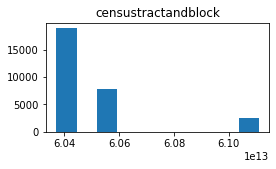

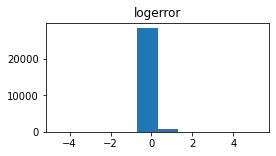

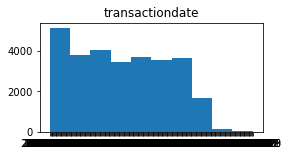

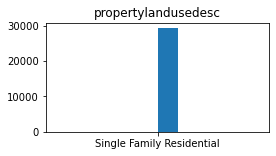

In [26]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()


### Takeaways:
- bathroomcnt, bedroomcnt, latitude and normally distributed. Yearbuilt is sort of too.
- Claculatedbathnbr, calculatedfinishedsquarefeet, finishedsquarefeet12, fullbathcnt and transactiondate are skewed right. Longitude is slightly skewed left. I will want to use spearman's correlation test when testing the linear relationships due to the skew.


#### 2. Does logerror differ based on yearbuilt?

1. Plot logerror vs. yearbuilt

2. 2-sample, 2-tailed t-test comparing the mean year built vs logerror.

In [ ]:
sns.boxplot(train.logerror, train.transactiondate)
plt.title("Does the age of the house affect the logerror?")
plt.show()

Is there a relationship
between logerror and yearbuilt?


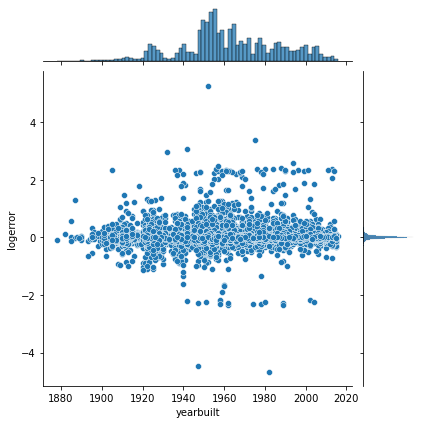

In [29]:
print("Is there a relationship\nbetween logerror and yearbuilt?")
sns.jointplot(x="yearbuilt", y="logerror", data=train)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


#### Takeaways:
- Logerror increases from the 1940s and on. Consider binning.


#### 3. Is there a relationship between 

### Mall customers

1. Acquire data from the customers table in the mall_customers database.

In [ ]:
# from our acquire.py:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
sql_query = query = '''
SELECT
    *
FROM mall_customers
'''
    
def get_mall_customers_data():
    df = pd.read_sql(sql_query, get_connection('mall_customers'))
    df = df.drop(columns='id')
    return df

In [ ]:
df.shape